<a href="https://colab.research.google.com/github/MaazDeCoder/Projects/blob/main/Linear%20Regression%20Models/Student_Performance_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Grade Prediction Using Linear Regression


> **Project Type:** Supervised Regression <br>
> **Model**: Linear Regression (scikit-learn) <br>
> **Level**: Applied ML (Foundational) <br>

## 1. Project Overview
**Objective**:
The goal of this project is to predict a student's **FinalGrade** based on academic, behavioral, and contextual features using a **Linear Regression Model**.

## 2. Dataset Description
The dataset contains information about students, including:
|Column|	Description|
|---|---|
StudentID |	Unique identifier for each student.
Name |	Randomly generated student name.
Gender|	Gender of the student (Male / Female).
AttendanceRate|	Percentage of classes attended.
StudyHoursPerWeek|	Hours spent studying weekly.
PreviousGrade|	Grade from the previous semester (out of 100).
ExtracurricularActivities	|Number of extracurricular activities.
ParentalSupport|	Level of parental support (High / Medium / Low).
FinalGrade|	Final grade (out of 100) — Target variable for prediction.
Study Hours	| Daily study hours (new column).
Attendance (%) |	Attendance percentage in numeric form (new column).
Online Classes Taken|	Whether the student has attended online classes (True / False).

**Note:** For this grade prediction analysis, we are using a publicly available dataset hosted on Kaggle. You can access the specific raw data [here](https://www.kaggle.com/datasets/haseebindata/student-performance-predictions/data).



### Target Variable
- FinalGrade - Continuous numerical variable

### Feature Overview
- StudentID
- Name
- Gender
- AttendanceRate
- StudyHoursPerWeek
- PreviousGrade
- ExtracurricularActivities
- ParentalSupport
- FinalGrade
- Study Hours
- Attendance (%)
- Online Classes Taken

## 3. Probelem Framing
We assume that the relationship between the target and predictors is **approximately linear**, which motivates the use of Linear Regression.

## 4. Data Loading and Initial Inspection
In this section, we:
- Load the dataset
- Inspect the first few rows
- Examing column names and data types

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
students_df = pd.read_csv('/content/drive/MyDrive/Datasets/student_performance.csv')
students_df.head(5)

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [3]:
students_df.shape # There are 1000 rows and 12 columns

(1000, 12)

In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


The dataset contains a total of 12 columns. We can see that 4 of these columns contain object data types (like text or categories), while the remaining 8 columns are numerical, using the float64 data type.

## 5. Data Cleaning

### 5.1 Removing Non-Informative Columns
Features such as Name and StudentID are unique identifiers and do not provide any predictive power for grade outcomes. Consequently, we will remove them to prevent the model from learning irrelevant patterns and to improve general accuracy.

In [5]:
students_df.drop(['Name','StudentID'],axis = 1, inplace = True)
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     952 non-null    object 
 1   AttendanceRate             960 non-null    float64
 2   StudyHoursPerWeek          950 non-null    float64
 3   PreviousGrade              967 non-null    float64
 4   ExtracurricularActivities  957 non-null    float64
 5   ParentalSupport            978 non-null    object 
 6   FinalGrade                 960 non-null    float64
 7   Study Hours                976 non-null    float64
 8   Attendance (%)             959 non-null    float64
 9   Online Classes Taken       975 non-null    object 
dtypes: float64(7), object(3)
memory usage: 78.3+ KB


### 5.2 Missing Value Analysis

In [6]:
students_df.isnull().sum()

,0
Gender,48
AttendanceRate,40
StudyHoursPerWeek,50
PreviousGrade,33
ExtracurricularActivities,43
ParentalSupport,22
FinalGrade,40
Study Hours,24
Attendance (%),41
Online Classes Taken,25


Note: Never impute the target variable (label).
So, drop all rows where FinalGrade is missing.

In [7]:
students_df.dropna(subset=["FinalGrade"], inplace=True)

For Numerical Features:
  - Use **Median Imputation** if there are outliers or **Mean Imputation** if the data is normaly distributed.

For Categorical Features:
  - Fill with the **Mode.**

In [8]:
# Numerical Imputation
num_cols = ['AttendanceRate','StudyHoursPerWeek','PreviousGrade','ExtracurricularActivities','Study Hours','Attendance (%)']
num_imputer = SimpleImputer(strategy='median')
students_df[num_cols] = num_imputer.fit_transform(students_df[num_cols])

# Categorical Imputation
cat_cols = ['Gender','ParentalSupport','Online Classes Taken']
cat_imputer = SimpleImputer(strategy='most_frequent')
students_df[cat_cols] = cat_imputer.fit_transform(students_df[cat_cols])

students_df.isnull().sum()

,0
Gender,0
AttendanceRate,0
StudyHoursPerWeek,0
PreviousGrade,0
ExtracurricularActivities,0
ParentalSupport,0
FinalGrade,0
Study Hours,0
Attendance (%),0
Online Classes Taken,0


## 6. Exploratory Data Analysis (EDA)

### 6.1 Descriptive Statistics


In [9]:
students_df.describe()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%)
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,85.600000,17.644792,77.621875,1.494792,80.030208,2.399896,77.278125
std,7.171837,6.103203,9.814427,1.032311,9.493652,1.610727,19.102128
min,70.000000,8.000000,60.000000,0.000000,62.000000,-5.000000,50.000000
25%,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,64.000000
50%,88.000000,18.000000,78.000000,1.000000,80.000000,2.500000,76.000000
75%,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000
max,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,200.000000


We found impossible data points, such as negative Study Hours (-5) and Attendance exceeding 100% (200), which must be cleaned to avoid biasing the model.

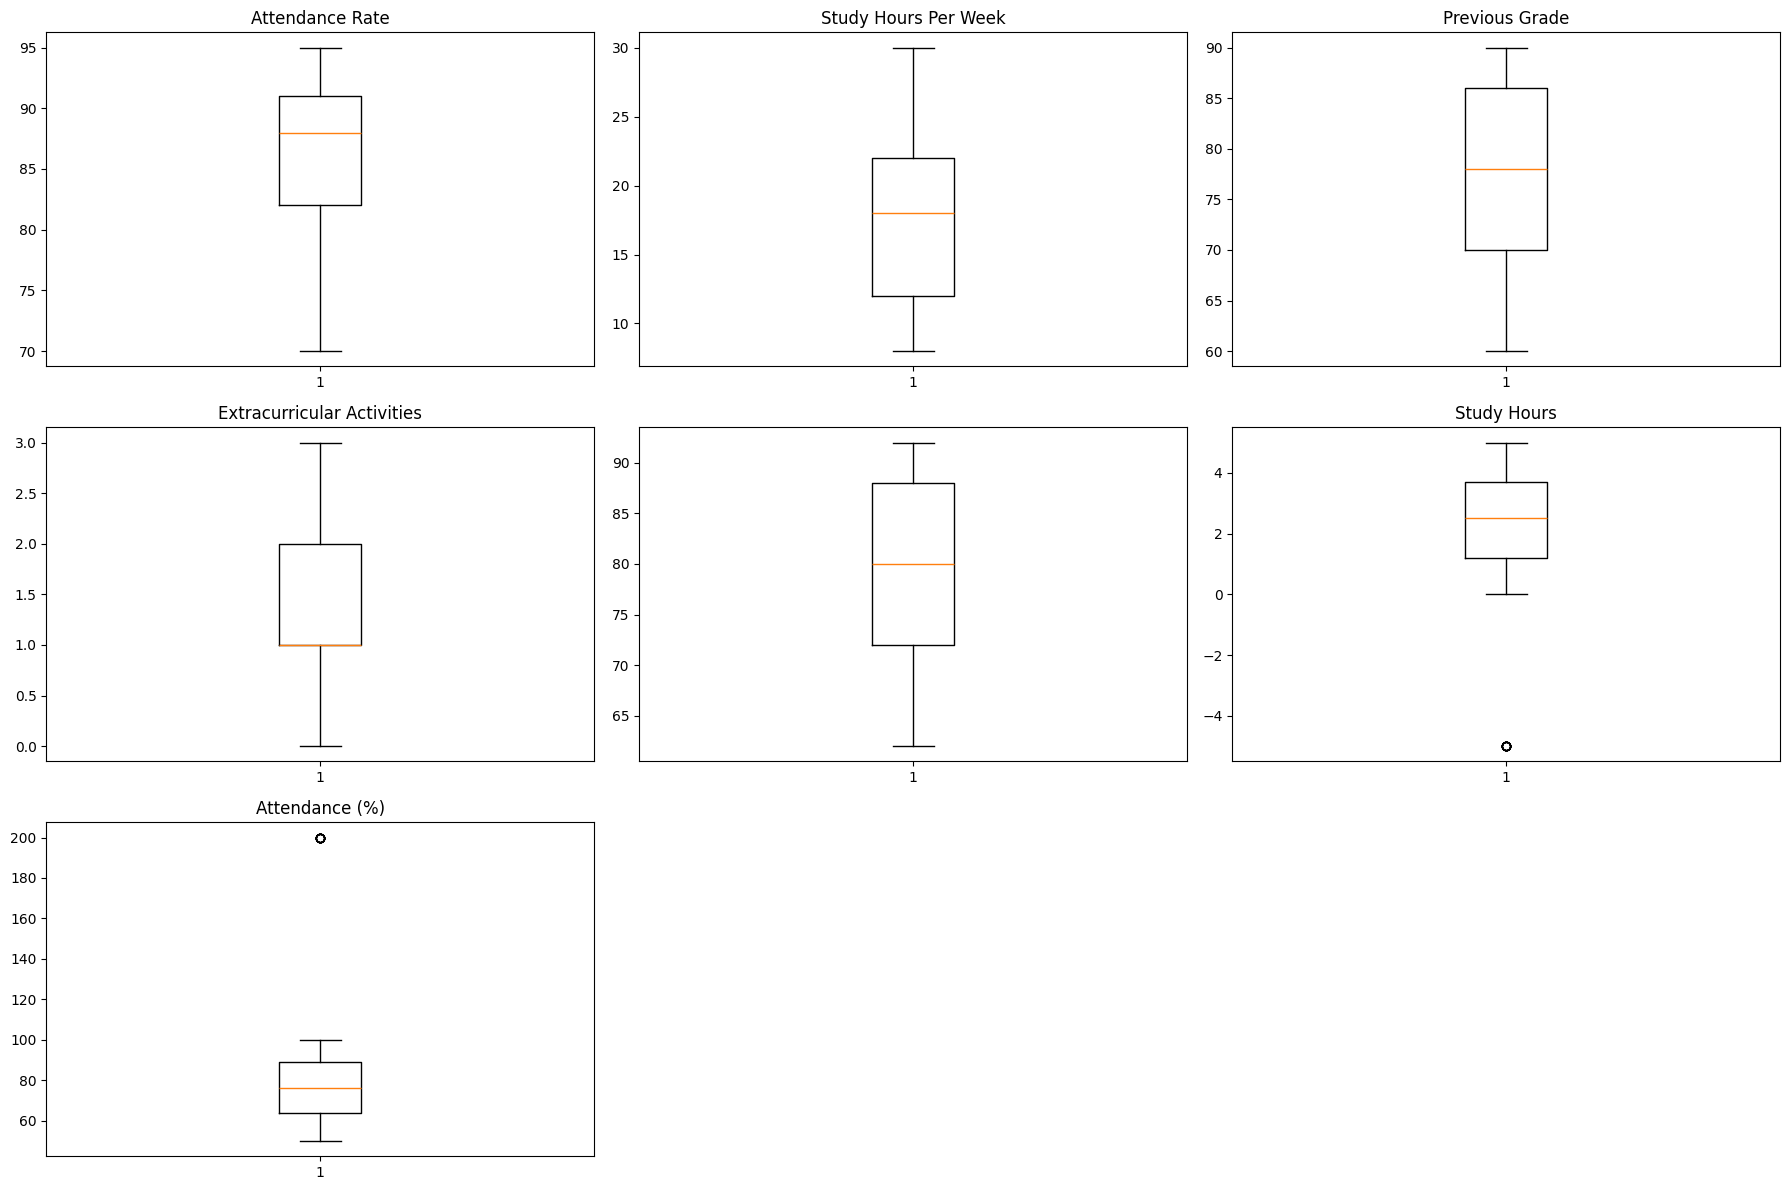

In [10]:
fig, ax = plt.subplots(3,3, figsize=(18,12))
axes = ax.flatten()

axes[0].boxplot(students_df['AttendanceRate'])
axes[0].set_title('Attendance Rate')
axes[1].boxplot(students_df['StudyHoursPerWeek'])
axes[1].set_title('Study Hours Per Week')
axes[2].boxplot(students_df['PreviousGrade'])
axes[2].set_title('Previous Grade')
axes[3].boxplot(students_df['ExtracurricularActivities'])
axes[3].set_title('Extracurricular Activities')
axes[4].boxplot(students_df['FinalGrade'])
axes[5].set_title('FinalGrade')
axes[5].boxplot(students_df['Study Hours'])
axes[5].set_title('Study Hours')
axes[6].boxplot(students_df['Attendance (%)'])
axes[6].set_title('Attendance (%)');

for i in range(7,9):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

The boxplots reveal significant outliers (marked as dots) in Study Hours and Attendance, including mathematically impossible negative values and percentages over 100. We must remove or clip these points to prevent them from skewing our Linear Regression line.

In [11]:
# Remove negative value
students_df = students_df[students_df['Study Hours'] >= 0]

In [12]:
# Clip the outliers to 100
students_df[students_df['Attendance (%)'] > 100] = 100

### 6.2 Relationship between Features and Target

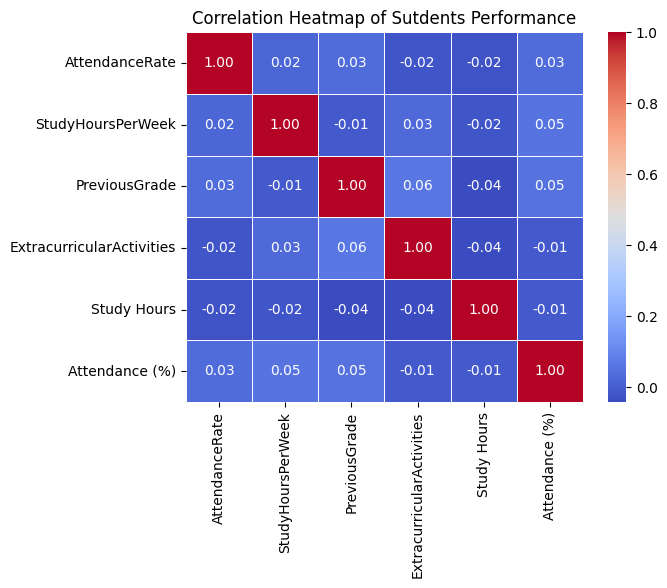

In [13]:
sns.heatmap(students_df[num_cols].corr(),
            annot=True,
            cmap = "coolwarm",
            fmt=".2f",
            linewidths="0.5")
plt.title("Correlation Heatmap of Sutdents Performance");

> Note: Correlation analysis was limited to numerical features only.
Categorical variables were excluded at this stage to avoid misleading statistical relationship

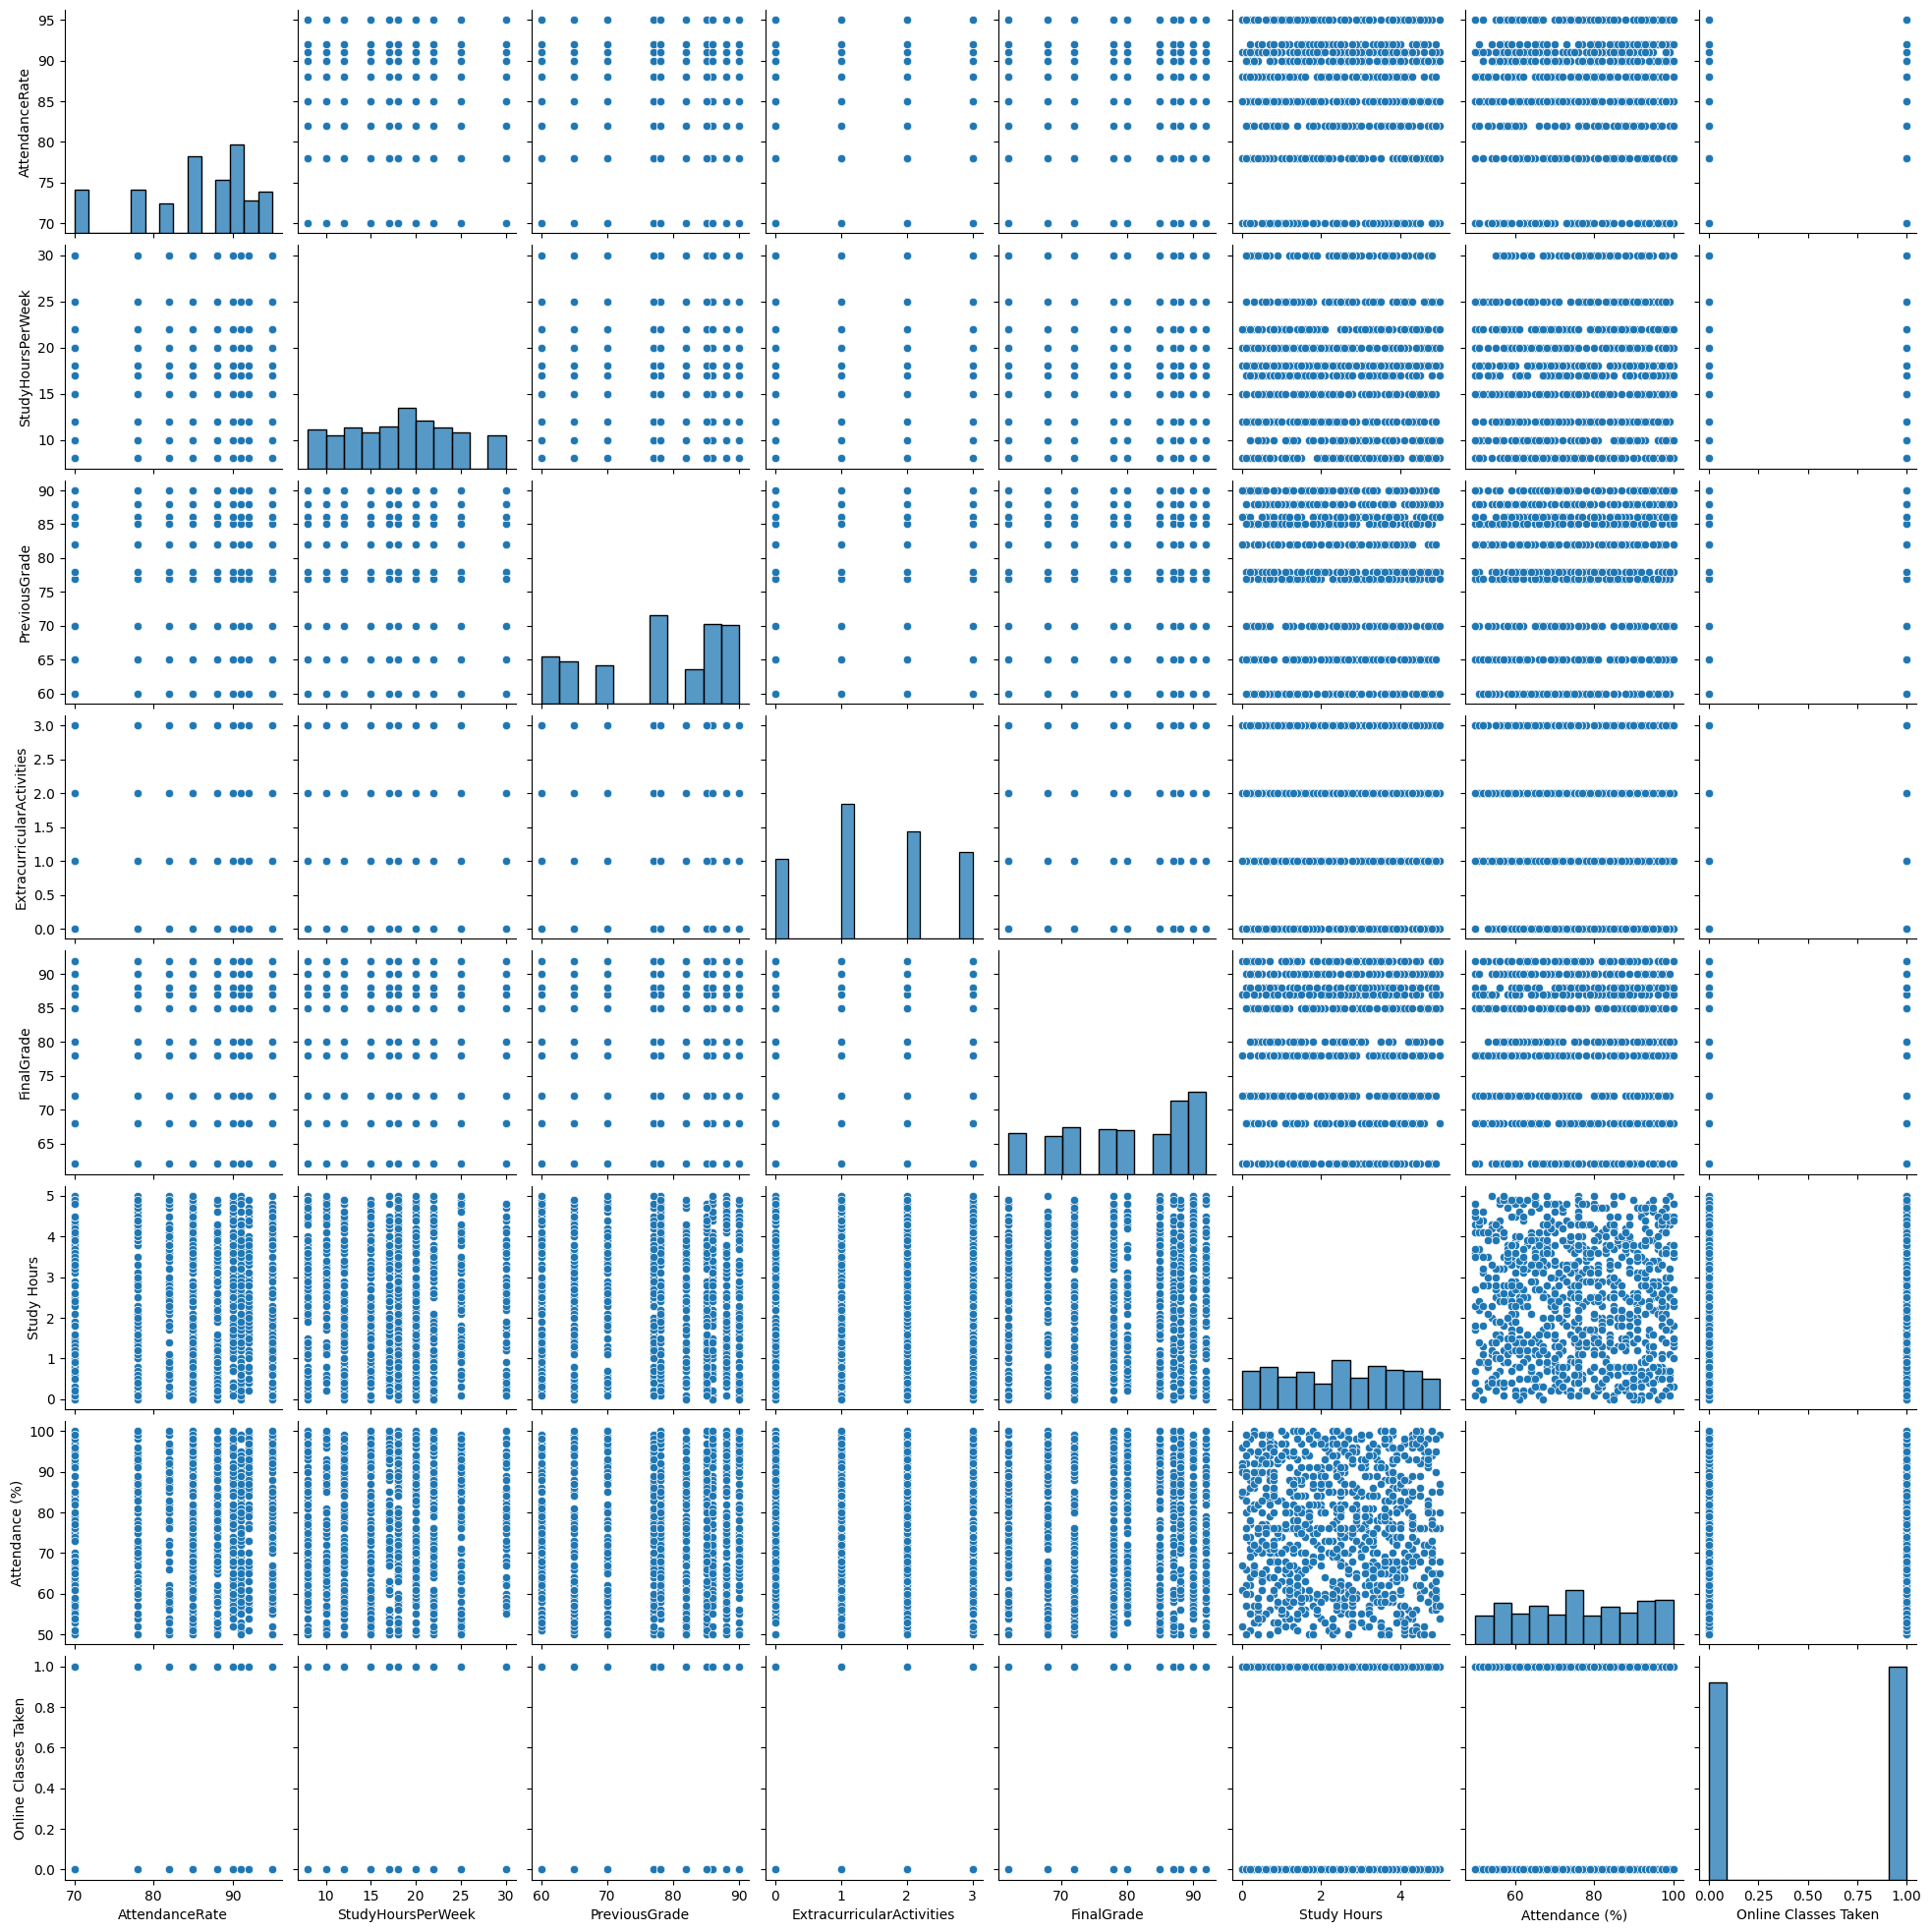

In [14]:
sns.pairplot(students_df)
plt.show()

## 7. Feature Engineering

### 7.1 Encoding Categorical Variables


In [15]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(students_df[cat_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))

encoded_students_df = pd.concat([students_df.drop(columns = cat_cols).reset_index(drop=True), encoded_df.reset_index(drop = True)], axis = 1)

encoded_students_df.head(5)

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%),Gender_Female,Gender_Male,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium,Online Classes Taken_False,Online Classes Taken_True
0,85.0,15.0,78.0,1.0,80.0,4.8,59.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,90.0,20.0,85.0,2.0,87.0,2.2,70.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,78.0,10.0,65.0,0.0,68.0,4.6,92.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,92.0,25.0,90.0,3.0,92.0,2.9,96.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,88.0,18.0,82.0,2.0,85.0,4.1,97.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


All categorical variables have been successfully encoded; the entire dataset now consists of numerical (float) data types, making it compatible with the Scikit-Learn model.

In [16]:
encoded_students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AttendanceRate              950 non-null    float64
 1   StudyHoursPerWeek           950 non-null    float64
 2   PreviousGrade               950 non-null    float64
 3   ExtracurricularActivities   950 non-null    float64
 4   FinalGrade                  950 non-null    float64
 5   Study Hours                 950 non-null    float64
 6   Attendance (%)              950 non-null    float64
 7   Gender_Female               950 non-null    float64
 8   Gender_Male                 950 non-null    float64
 9   ParentalSupport_High        950 non-null    float64
 10  ParentalSupport_Low         950 non-null    float64
 11  ParentalSupport_Medium      950 non-null    float64
 12  Online Classes Taken_False  950 non-null    float64
 13  Online Classes Taken_True   950 non

In [17]:
encoded_students_df.describe()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%),Gender_Female,Gender_Male,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium,Online Classes Taken_False,Online Classes Taken_True
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,85.614737,17.631579,77.622105,1.492632,80.011579,2.477789,75.986316,0.445263,0.554737,0.366316,0.305263,0.328421,0.481053,0.518947
std,7.165292,6.082247,9.837528,1.033398,9.515274,1.427829,14.434870,0.497257,0.497257,0.482051,0.460761,0.469886,0.499904,0.499904
min,70.000000,8.000000,60.000000,0.000000,62.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88.000000,18.000000,78.000000,1.000000,80.000000,2.500000,76.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Because our data has very different ranges (attendance rates are 70+, but gender is 0 or 1), we need to apply feature scaling. This prevents variables with larger numbers from being treated as more important

### 7.2 Feature Scaling

Before applying feature scaling, we must perform a **Train-Test Split**. We will then **fit** our scaler specifically on the **Training Data** and use those parameters to **transform** both the training and testing sets. This sequence is vital to prevent **Data Leakage**, ensuring that information from our 'unseen' test data does not influence the scaling process.

## 8. Train-Test Split
The dataset is split into training and testing sets to evaluate generalization performance.

In [18]:
x = encoded_students_df.drop('FinalGrade', axis=1)
y = encoded_students_df['FinalGrade']

In [19]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 9. Model Training - Linear Regression


We train a **Linear Regression** model using scikit-learn

In [21]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

## 10. Model Evaluation

In [22]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: -0.029792617724855308


In [23]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 94.58573878524562


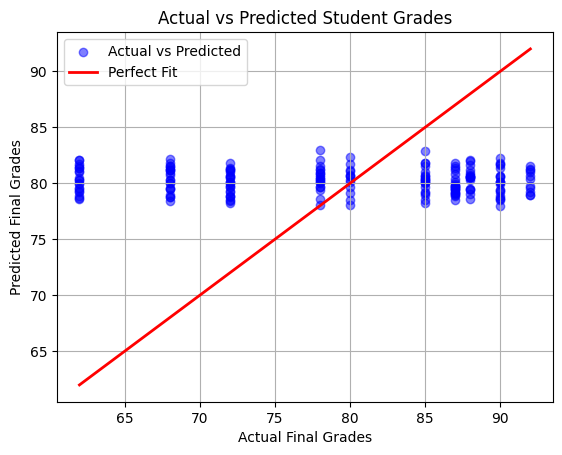

In [24]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted');
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, label='Perfect Fit')
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Actual vs Predicted Student Grades')
plt.legend()
plt.grid(True)
plt.show()

"The Actual vs. Predicted plot reveals that the model is underfitting.This confirms that the features provided do not have enough predictive power to move the model's estimates away from the average."


## Conclusion
Although the linear regression model was implemented and evaluated correctly, it performs poorly due to the nature of the dataset. The data is synthetic, intentionally noisy, and lacks a true linear relationship between features and the target variable.This outcome highlights a fundamental principle of machine learning: **model performance is constrained by data quality and underlying structure.**

The project is therefore concluded at this stage. Further optimization on this dataset is not scientifically justified, and the same pipeline should be applied to a real-world dataset to meaningfully assess linear regression performance.